In [2]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

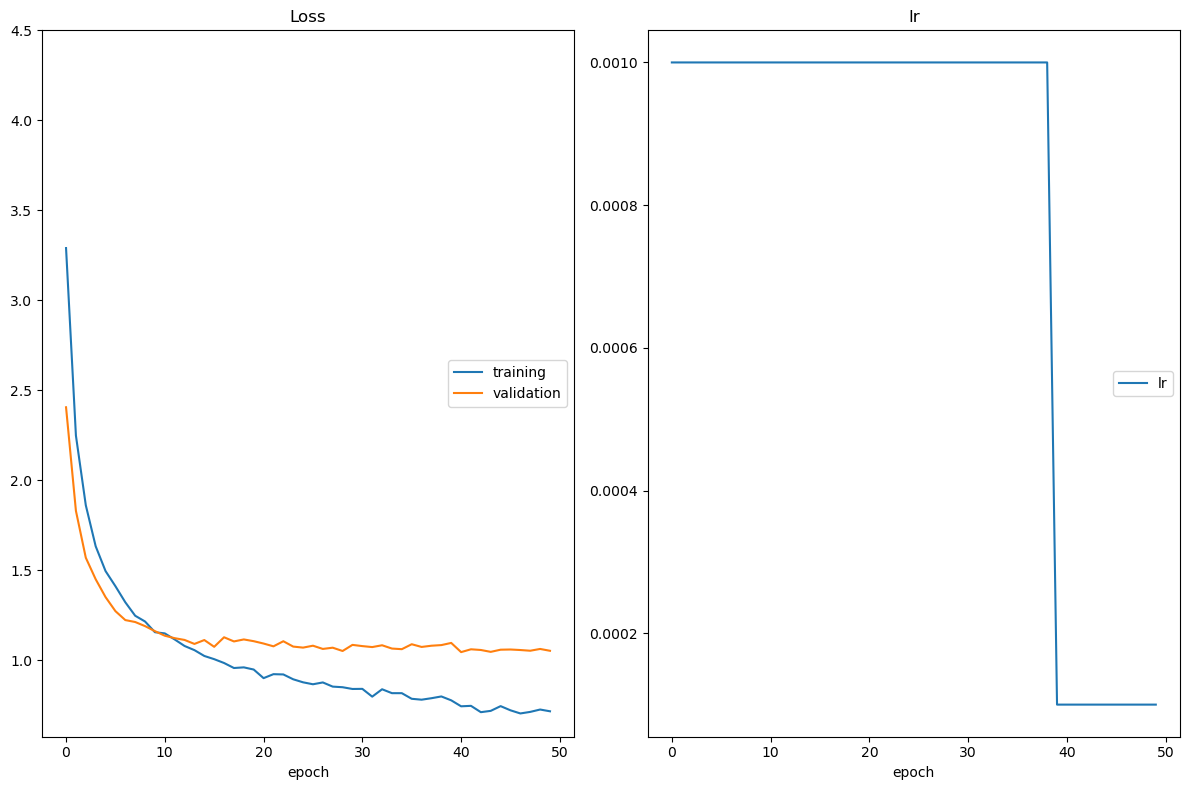

In [3]:
from Data import (get_data_loaders)
from Optimization import get_optimizer, get_loss
from Training import optimize
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning(model_name="resnet18", n_classes=50)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer18.pt",
    interactive_tracking=True
)

In [4]:
import torch
from Training import one_epoch_test
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer18.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Froze 62 groups of parameters


Testing: 100%|██████████████████████████████████| 20/20 [00:09<00:00,  2.21it/s]

Test Loss: 0.940954


Test Accuracy: 74% (931/1250)


0.9409540072083472

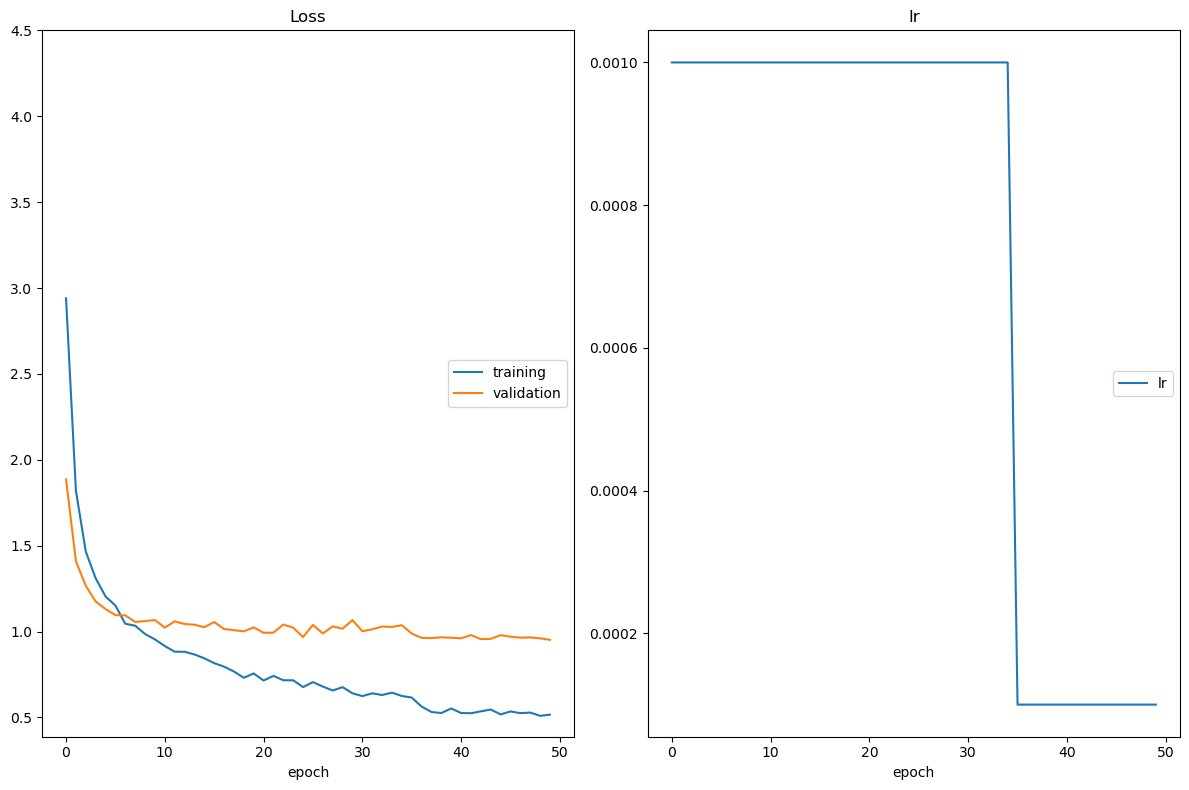

In [5]:
from Data import (get_data_loaders)
from Optimization import get_optimizer, get_loss
from Training import optimize
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning(model_name="resnet50", n_classes=50)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer50.pt",
    interactive_tracking=True
)

In [6]:
import torch
from Training import one_epoch_test
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet50", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer50.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Froze 161 groups of parameters


Testing: 100%|██████████████████████████████████| 20/20 [00:08<00:00,  2.46it/s]

Test Loss: 0.807236


Test Accuracy: 79% (994/1250)


0.8072356253862379

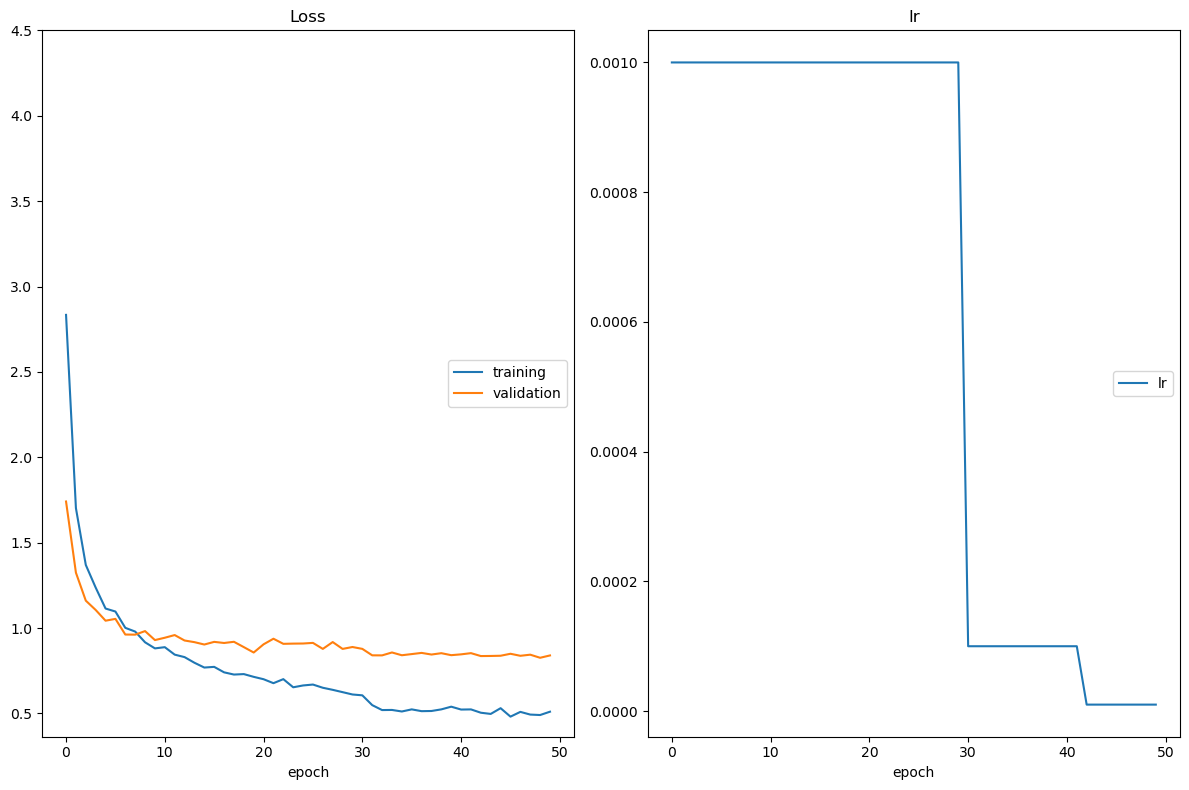

In [7]:
from Data import (get_data_loaders)
from Optimization import get_optimizer, get_loss
from Training import optimize
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning(model_name="resnet152", n_classes=50)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer152.pt",
    interactive_tracking=True
)

In [8]:
import torch
from Training import one_epoch_test
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet152", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer152.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Froze 467 groups of parameters


Testing: 100%|██████████████████████████████████| 20/20 [00:08<00:00,  2.38it/s]

Test Loss: 0.784398


Test Accuracy: 80% (1001/1250)


0.784397992491722